In [1]:
import time
import math
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym
from sympy import *

from IPython.display import display
from sympy.interactive import printing

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = (9,4)

# Tipografia matemática e $\LaTeX$
27 de fevereiro de 2019

Hoje vamos aprender a escrever lindas equações em matemática, por exemplo o **Teorema de Pitágoras**, $a^2 = b^2 +     c^2$, e também uma fração $\frac{x+y}{z}$. Também escrevemos a fórmula que resolve a *equação quadrática* $a  x^2 + b   x + c=0$, que tem por solução 

$$\frac{-b\pm \sqrt{b^2-4ac}}{2 a}$$

# Conjuntos e funções
07 de março de 2019

$ \mathbb{C} $ Conjunto dos Complexos

$ \mathbb{R} $ Conjunto dos Reais

$ \mathbb{I} $ Conjunto dos Irracionais

$ \mathbb{Q} $ Conjunto dos Racionais

$ \mathbb{Z} $ Conjunto dos Inteiros

$ \mathbb{N} $ Conjunto dos Naturais

- **Desafio 1**:
Dado $x$, implementar a função $f(x)= 2x^3-4x^2+1$
 
- **Desafio 2**:
Dado dois numeros, ver qual é o maior

- **Desafio 3**:
Dado os valores necessários, retorne o resultado $ax^4+bx^3+cx^2+dx+e$

In [3]:
# desafio 1
f = lambda x: 2*x**3 - 4*x**2 + 1

print(f(0))
print(f(1))
print(f(23))

1
-1
22219


In [4]:
# desafio 2
# retornar maior elemento de uma lista

def maior(array):
    if len(array) == 1:
        return array[0]

    menor = sum(array)
    new_array = []
    for i in array:
        if i <= menor:
            menor = i
    return maior([i for i in array if i != menor])

# recursivo
def maior_r(list):
    if len(list) == 1:
        return list
    else:
        comparador = []
        result = []
        for i in list:
            if i not in comparador:
                comparador.append(i)
        for k in comparador:
            for i in list:
                if k > i:
                    if k not in result:
                        result.append(k)
        return maior(result)

# utilizando reduce
greater = lambda array: reduce(lambda x, y: x if x>y else y, array)

In [5]:
array = [1, 1, 3, 4, 5, 6, 777, 8]

print(maior_r(array))
print(maior(array))
print(greater(array))

777
777
777


In [6]:
# obtendo os tempos de execução
# a função  'maior' apresentou erro de memória, então
# não foi considerada no teste

# array aleatório
array = np.random.uniform(0, 9+1, 10000).astype(int)

print('maior_r')
start = time.time()
maior_r(array)
print(time.time() - start, end='\n\n')

print('reduce')
start = time.time()
greater(array)
print(time.time() - start)

maior_r
0.025028467178344727

reduce
0.0013935565948486328


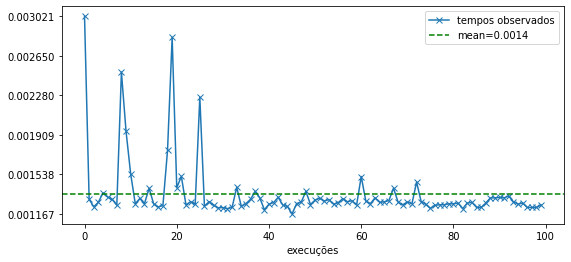

In [7]:
# registrando 100x os tempos de execução para a
# função 'greater'

times = []
for i in range(100):
    start = time.time()
    greater(array)
    end = time.time() - start
    times.append(end)

# tempo médio
mean = sum(times)/len(times)

# plotando
plt.plot(times, marker='x', label='tempos observados');
plt.axhline(mean, linestyle='--', color='g', label=f'mean={round(mean, 4)}');
plt.yticks(np.linspace(min(times), max(times), len(times)//16));
plt.xlabel('execuções');
plt.legend();

In [8]:
# desafio 3
# obtendo coeficientes e valor de x
quartic_poly = lambda a, b, c, d, e, x: a*x**4 + b*x**3 + c*x**2 + d*x + e

print(quartic_poly(0, 0, 0, 0, 0, 0))
print(quartic_poly(1, 1, 1, 1, 1, 1))
print(quartic_poly(5, 4, 5, 2, 1, 10))

0
5
54521


# Funções, domínio e imagem
13 de março de 2019

Uma função ou aplicação é uma relação de um conjunto ${\textstyle A}$ com um conjunto ${\textstyle B.}$ Usualmente, denotamos uma tal função por ${\textstyle f:A\to B,}$ ${\textstyle y=f(x),}$ onde ${\textstyle f}$ é o nome da função, ${\textstyle A}$ é chamado de domínio, ${\textstyle B}$ é chamado de contradomínio e ${\textstyle y=f(x)}$ expressa a lei de correspondência (relação) dos elementos ${\textstyle x\in A}$ com os elementos ${\textstyle y\in B.}$

$$f(x) : X \longrightarrow Y$$

## Exemplos

$$f(x) : \mathbb{R} \longrightarrow \mathbb{R}^{\ge0} \ | \ f(x) = \sqrt x$$
$$f(x):\mathbb{R}^{\ne1} \longrightarrow \mathbb{R}^{\ne0}$$
$$f(x)= \frac {1} {\sqrt(x^2-4)}$$

## Exercício
$$f(x) = \sqrt{x+2}$$
$$f(x) = \frac{1}{x^2 - x}$$

- $ x \ge -2$
- $ -1 < x < 1$

In [9]:
# x >= 2
# -1 < x < 1

print((lambda x: (x + 2)**1/2)(-1))
print((lambda x: (x + 2)**1/2)(0), end='\n\n')

print((lambda x: (x**2 - x)**(-1))(-1))
print((lambda x: (x**2 - x)**(-1))(.5))

0.5
1.0

0.5
-4.0


# *List comprehension*
20 de março de 2019

$$ S=\left\{ 1, \ \frac{1}{2}, \ \frac{1}{3}, \ \frac{1}{4}, \ \frac{1}{5}, \ \dots \ \frac{1}{n} \right\} $$

In [10]:
[1/n for n in range(1,25)]

[1.0,
 0.5,
 0.3333333333333333,
 0.25,
 0.2,
 0.16666666666666666,
 0.14285714285714285,
 0.125,
 0.1111111111111111,
 0.1,
 0.09090909090909091,
 0.08333333333333333,
 0.07692307692307693,
 0.07142857142857142,
 0.06666666666666667,
 0.0625,
 0.058823529411764705,
 0.05555555555555555,
 0.05263157894736842,
 0.05,
 0.047619047619047616,
 0.045454545454545456,
 0.043478260869565216,
 0.041666666666666664]

$$ S= \left\{ \frac{1}{1^2}, \ \frac{1}{2^2}, \ \frac{1}{3^2}, \ \frac{1}{4^2}, \ \frac{1}{5^2}, \ \dots \ \frac{1}{n^2} \right\} $$

In [11]:
[1/n**2 for n in range(1,25)]

[1.0,
 0.25,
 0.1111111111111111,
 0.0625,
 0.04,
 0.027777777777777776,
 0.02040816326530612,
 0.015625,
 0.012345679012345678,
 0.01,
 0.008264462809917356,
 0.006944444444444444,
 0.005917159763313609,
 0.00510204081632653,
 0.0044444444444444444,
 0.00390625,
 0.0034602076124567475,
 0.0030864197530864196,
 0.002770083102493075,
 0.0025,
 0.0022675736961451248,
 0.002066115702479339,
 0.001890359168241966,
 0.001736111111111111]

$$ S=\left\{ \frac{1}{2^1}, \ \frac{1}{2^2}, \ \frac{1}{2^3}, \ \frac{1}{2^4}, \dots \ \frac{1}{2^n}, \ \right\} $$

In [12]:
[1/2**n for n in range(1,25)]

[0.5,
 0.25,
 0.125,
 0.0625,
 0.03125,
 0.015625,
 0.0078125,
 0.00390625,
 0.001953125,
 0.0009765625,
 0.00048828125,
 0.000244140625,
 0.0001220703125,
 6.103515625e-05,
 3.0517578125e-05,
 1.52587890625e-05,
 7.62939453125e-06,
 3.814697265625e-06,
 1.9073486328125e-06,
 9.5367431640625e-07,
 4.76837158203125e-07,
 2.384185791015625e-07,
 1.1920928955078125e-07,
 5.960464477539063e-08]

In [13]:
[(i,k) for i in range(1,3+1) for k in range(1,9+1)[i:]]

[(1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9)]

# Sequências, séries, limites e constantes
21 de março de 2019

In [14]:
# termo geral PA
def termo_pa(termo_s0, r, n):
    return termo_s0 + r*(n-1)

# soma de n termos da PA
def soma_pa(termo_s0, r, n):
    return int((termo_s0 + termo_pa(termo_s0, r, n)) * n/2)

print(list(range(5, (5*10)+1, 5)))
print('termo 3 =', termo_pa(termo_s0=5, r=5, n=3))
print('soma 3 termos =', soma_pa(termo_s0=5, r=5, n=3), end='\n\n')

print(list(range(1, (1*10)+1, 1)))
print('termo 10 =', termo_pa(termo_s0=1, r=1, n=10))
print('soma 10 termos =', soma_pa(termo_s0=1, r=1, n=10))

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
termo 3 = 15
soma 3 termos = 30

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
termo 10 = 10
soma 10 termos = 55


## Série Harmônica
$${\displaystyle \sum _{k=1}^{\infty }{\frac {1}{k}}=1+{\frac {1}{2}}+{\frac {1}{3}}+{\frac {1}{4}}+\cdots }$$

In [15]:
def serie_harmonica(n):
    return [1/n for n in range(1, n+1)]

print(serie_harmonica(5), end='\n\n')
print(sum(serie_harmonica(5000)))
print(sum(serie_harmonica(50000)))

[1.0, 0.5, 0.3333333333333333, 0.25, 0.2]

9.094508852984404
11.397003949278504


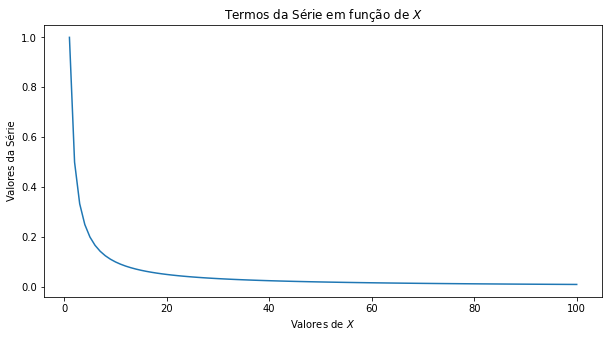

In [16]:
n = 100
plt.figure(figsize=(10,5))
plt.plot(range(1,n+1), serie_harmonica(n));
plt.xlabel('Valores de $X$');
plt.ylabel('Valores da Série');
plt.title('Termos da Série em função de $X$');

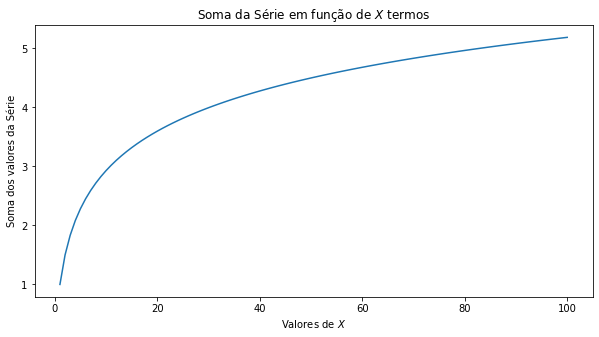

In [17]:
n = 100
plt.figure(figsize=(10,5))
plt.plot(range(1,n+1), [sum(serie_harmonica(n)) for n in range(1,n+1)]);
plt.xlabel('Valores de $X$');
plt.ylabel('Soma dos valores da Série');
plt.title('Soma da Série em função de $X$ termos');

## Constante $e$: número de Euler
$$ e = 1 + \frac{1}{1!} + \frac{1}{2!} + \frac{1}{3!} + \frac{1}{4!} \ + \dots + \ \frac{1}{n!} $$



$ e = 2,718281828459045235360287 $

In [18]:
calc_e = lambda n:sum([1/math.factorial(n) for n in range(n)])

print(calc_e(10))
print(calc_e(100))

2.7182815255731922
2.7182818284590455


In [19]:
def fatorial(n):
    mult = 1
    for i in range(1, n+1):
        mult *= i
    return mult

def euler(n):
    serie = [1/fatorial(i) for i in range(0, n)]
    return sum(serie)

euler(100)

2.7182818284590455

## $\pi$: Número Pi

$$
S = \left\{ \frac{1}{1^3}, - \ \frac{1}{3^3}, + \ \frac{1}{5^3}, + \ \dots \ \pm \frac{1}{(2n-1)^3} \right\} \\
\pi = S^{\frac{2^5}{3}}
$$

In [20]:
pi = lambda n: (sum([1*(1/((2*n-1)**3)) if i%2 == 1 else -1*(1/((2*n-1)**3)) for i in range(1,n+1)]))**(32/3)
pi(50000)

0.0

In [21]:
1*(1/((2*(6)-1)**3))

0.0007513148009015778

# Gráfico de funções

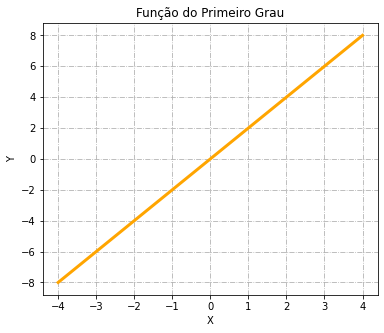

In [22]:
# primeiro grau
x = np.linspace(-4, 4, 100)
f1 = 2*x

plt.figure(figsize=(6,5))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle= '-.')
plt.title('Função do Primeiro Grau')

plt.plot(x, f1, color="orange", linewidth=3.0, linestyle="-")
# plt.savefig('linear.png', dpi=72)
plt.show()

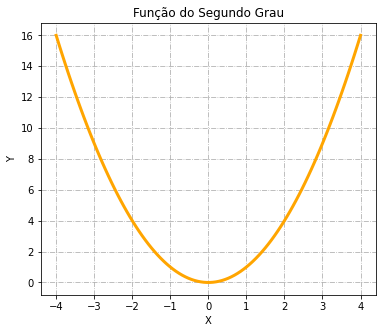

In [23]:
# segundo grau
x = np.linspace(-4, 4, 100)
f2 = x**2

plt.figure(figsize=(6,5))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle= '-.')
plt.title('Função do Segundo Grau')

plt.plot(x, f2, color='orange', linewidth=3.0, linestyle="-")
# plt.savefig('quadratica.png", dpi=72)
plt.show()

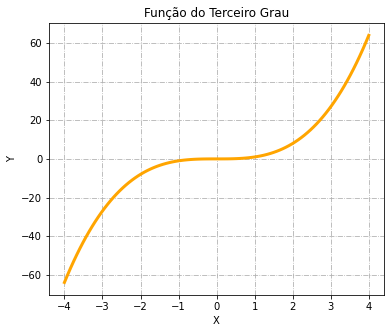

In [24]:
# terceiro grau
x = np.linspace(-4, 4, 100)
f3 = x**3

plt.figure(figsize=(6,5))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle= '-.')
plt.title('Função do Terceiro Grau')

plt.plot(x, f3, color='orange', linewidth=3.0, linestyle="-")
# plt.savefig('cubica.png', dpi=72)
plt.show()

# Lista de exercícios 1

In [25]:
# 1) a.
lim = lambda n: [1/n for n in range(1, n+1)][-1]

print(lim(10))
print(lim(100))
print(lim(1000))
print(lim(10000))

0.1
0.01
0.001
0.0001


In [26]:
# 1) b.
soma_serie = lambda k: sum([1/k for i in range(1, k+1)])
soma_serie(10)

0.9999999999999999

In [27]:
# 1) c.
soma_serie(100)

1.0000000000000007

In [28]:
# 2) a.
def mult_sucessiva(n):
    fat = 1
    for i in range(1, n+1):
        fat *= i
        print(fat)

mult_sucessiva(9)

1
2
6
24
120
720
5040
40320
362880


In [29]:
# 2) b.
fatorial = lambda n: 1 if n == 0 else n*fatorial(n-1)
fatorial(5)

120

In [30]:
# 2) c.
n = 10
[1/fatorial(i) for i in range(0, n)]

[1.0,
 1.0,
 0.5,
 0.16666666666666666,
 0.041666666666666664,
 0.008333333333333333,
 0.001388888888888889,
 0.0001984126984126984,
 2.48015873015873e-05,
 2.7557319223985893e-06]

In [31]:
# 2) d.
n = 100
sum([1/fatorial(i) for i in range(0, n)])

2.7182818284590455

# Limites de funções
28 de março de 2019

$$\lim_{x \to 1} \frac{x - 1}{x^2 - 1} \approx \frac{1}{2} $$

In [32]:
X = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, .95, .99, .99999]
fx = lambda x: (x-1)/(x**2-1)

for x in X:
    print(fx(x))

1.0
0.9090909090909092
0.8333333333333334
0.7692307692307692
0.7142857142857143
0.6666666666666666
0.625
0.5882352941176472
0.5555555555555556
0.5263157894736843
0.5128205128205131
0.5025125628140701
0.500002500012707


$$\lim_{t \to 0} \frac{\sqrt{t^2 + 9}-3} {t^2}$$

In [33]:
X = [.5, .3, .1, .001, .0001, .000001]

fx = lambda t: ((t**2+9)**(1/2)-3)/t**2

for x in X:
    print(fx(x))

0.16552506059643868
0.16625207040296747
0.16662039607266974
0.1666666618049817
0.1666666804567285
0.16653345369377348


#  Funções definidas por partes

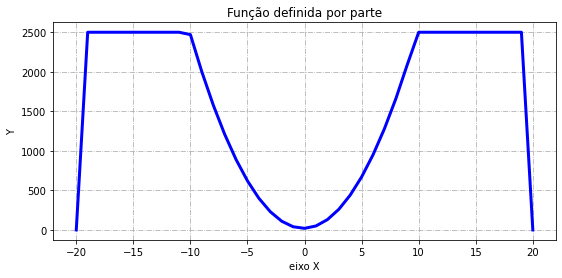

In [34]:
# pista de skate
def multiple_intervals(x):
    if (x < -10 and x >= -19) or (x >= 10 and x <= 19):
        return 2500
    elif x >= -10 and x < 10:
        return (5*x)**2 + (5*x) + 20
    else:
        return 0 

X = np.linspace(-20,20,41)
F = [multiple_intervals(x) for x in X]

plt.xlabel('eixo X')
plt.ylabel('Y')
plt.grid(True, linestyle = '-.')
plt.title("Função definida por parte")
plt.plot(X, F, color="blue", linewidth=3.0, linestyle="-")
# plt.savefig("multiplas_partes.png", dpi=72)
plt.show()

# *Lambda*

In [35]:
dobro = lambda x: 2*x
quadrado = lambda x: x**2
f1 = lambda x: 2*x**3-4*x+3
f2 = lambda x, y: x**2+x*y**2+y+1

print(dobro(6))
print(quadrado(9))
print(f1(4))
print(f2(6,3))

12
81
115
94


# Coeficiente diferencial

Coeficiente diferencial em matemática descreve a alteração na proporção de uma grandeza em relação a alteração de outra grandeza, dependente da primeira. Em análise usa-se o coeficiente diferencial, para cálculo para definir uma função. Em análise numérica são usados para resolver equações diferenciais e para a determinação aproximada da derivada de uma função utilizada.

$$\frac{f(a+h)-f(a)}{h}$$

In [36]:
coeficiente_diff = lambda f, a, h: (f(a+h) - f(a)) / h
coeficiente_diff(lambda x: x**2, 1, 4)

6.0

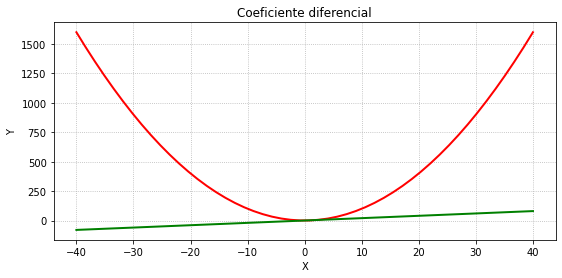

In [37]:
X = np.linspace(-40, 40, 50)
    
f1 = [x**2 for x in X]
f2 = [x*2 for x in X]

plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle = ':')
plt.title("Coeficiente diferencial")
plt.plot(X, f1, color='r', linewidth=2.0)
plt.plot(X, f2, color='g', linewidth=2.0)

plt.show()

# Lista de exercícios 2
11 de abril de 2019

# $$Q1. a)$$

In [38]:
[1/n for n in range(1,8)]

[1.0,
 0.5,
 0.3333333333333333,
 0.25,
 0.2,
 0.16666666666666666,
 0.14285714285714285]

# $$Q1. b)$$

In [39]:
[1/n for n in range(1,15) if n%2 == 1]

[1.0,
 0.3333333333333333,
 0.2,
 0.14285714285714285,
 0.1111111111111111,
 0.09090909090909091,
 0.07692307692307693]

# $$Q1. c)$$

In [40]:
[1/(factorial(n)) for n in range(0,6)]

[1, 1, 1/2, 1/6, 1/24, 1/120]

# $$Q1. d)$$

In [41]:
[1, [2**(-n) for n in range(0,10)]]

[1,
 [1,
  0.5,
  0.25,
  0.125,
  0.0625,
  0.03125,
  0.015625,
  0.0078125,
  0.00390625,
  0.001953125]]

# $$Q2.$$

In [42]:
factorial(5)

120

In [43]:
l = [1,2,3,4,5,6]
acc = 1
for i in l:
    acc *= i
    print(acc)

1
2
6
24
120
720


# $$Q3.$$

In [44]:
def serie_harmonica(n):
    k = n
    l = [1/k for k in range(1, k+1)]
    sum = 0
    for n in l:
        sum = sum + n
    return sum

serie_harmonica(5)

2.283333333333333

# $$Q4. a)$$

$\sum_{k=1}^{n} \frac{1}{k}$

$\sum_{k=1}^{n} \frac{1}{2 * k - 1}$

$\sum_{k=0}^{n} \frac{1}{k!}$

$(\sum_{k=0}^{n} \frac{1}{2^{k}})+1$

# $$Q5. a)$$

In [45]:
def function(n):
    if n > 0:
        k = n
        l = [1/k for k in range(1, k+1)]
        sum = 0
        for n in l:
            sum = sum + n
        print(sum)
function(5)

2.283333333333333


# $$Q5. b)$$

In [46]:
print('somatório de (1/k) com k ímpar e com n parcelas')
n = int(input('digite o número de parcelas a serem somadas (n > 0)'))
if n > 0:
    k = n + 1
    l = [1/k for k in range(1, k+1) if k%2 == 1]
    soma = 0
    for n in l:
        soma = soma + n
    print(soma)

somatório de (1/k) com k ímpar e com n parcelas
digite o número de parcelas a serem somadas (n > 0)5
1.5333333333333332


# $$Q5. c)$$

In [47]:
def soma(n):
    soma = 0
    for k in a:
        soma = soma + k
    return soma

def factorial(n):
    fac = 1
    for i in range(1, n + 1):
         fac = fac * i
    return fac

a = [1/factorial(n) for n in range(0, 7)]
soma([])

2.7180555555555554

# $$Q5.d)$$

In [48]:
def soma(n):
    soma = 0
    for i in lista:
        soma = soma + i
    return soma + 1

lista = [1/(2**n) for n in range(0,6)]
soma(lista)

2.96875

# $$Q6.$$

In [49]:
def factorial(n):
    mult = 1
    for i in range(1, n+1):
        mult = mult * i
    return mult

lista = [1/factorial(n) for n in range(0,10)]
soma = 0
for i in lista:
    soma = soma + i
print(f'Número de euler = {soma}')

Número de euler = 2.7182815255731922


# $$Q7.$$

In [50]:
[1/n for n in range(1,10)]
print(f'O limite é {1//n+1}')

O limite é 5.0


$$\lim_{n\to\infty}\
(1 + {1 \over 2} + {1 \over 4} + {1 \over 8} + {1 \over 16} = 0 )$$

# $$Q8.$$

In [51]:
[1/(1 - 1/n) for n in range(2,15)]
print(f'O limite é {1//1-(1/n+1)}')

O limite é -5.0


$$ \lim_{n \rightarrow \infty} \frac{1}{1- \frac{1}{n}} =1 $$

# $$Q9.$$

In [52]:
def minor(x, y, z):
    if z == None:
        l = [x, y]       
        l.sort()
        return l[0]
    lista = [x, y, z]       
    lista.sort()
    return lista[0]
    
minor(5,9,None)

5

# $$Q10. a)$$

In [53]:
def typ(n):
    if type(n) == str:
        return 'É uma string'
    else:
        return 'Não é string'

typ('oi')

'É uma string'

# $$10. b)$$

In [54]:
def soma(x, y):
    if type(x) and type(y) == int:
        return x + y
    else:
        return 'Soma somente de números inteiros'
    
soma(1,2.3)

'Soma somente de números inteiros'

# $$Q11. a)$$

In [55]:
def f(x):
    if x != 4:
        return 1 / (x - 4)
    else:
        print('Não existe divisão por zero')
f(5)

1.0

# $$11.b)$$

In [56]:
def f(x):
    if x != -4 and x != 4:
        return 1 / x**2 - 4
    else:
        print('Não existe divisão po zero')
f(5)

-3.96

# $$11.c)$$

In [57]:
def f(x):
    if x >= -4:
        return (x + 4)**(1/2)
    else:
        print('Não existe raiz de número negativo')
f(-5)

Não existe raiz de número negativo


# $$11.d)$$

In [58]:
def f(x):
    if x != 1 and x != -1:
        return (x - 1) / (x**2 - 1)
    else:
        print('Não existe divisão por zero')
f(1)

Não existe divisão por zero


# $$Q12.$$

$x \in \mathbb{R} \mid x \ge -4$

$x \in \mathbb{R} \mid x \neq 2 \mid x \neq -2$

$x \in \mathbb{R} \mid x \neq -4$

$x \in \mathbb{R} \mid x \neq 1$

# $$Q13.$$

# $$13.a)$$

In [59]:
def f(x1, x2, x3, x4, x5, x6):
    for n in [x1, x2, x3, x4, x5, x6]:
        if n != 1 and n != -1:
            print((n - 1) / (n**2 - 1))
        else:
            print('Não existe divisão por zero')
f(0.1,0.3,0.5,0.7,0.9,0.999999999999999)

0.9090909090909092
0.7692307692307692
0.6666666666666666
0.5882352941176472
0.5263157894736843
0.5


$$\lim_{x \to 1} \frac{x-1}{x^2 - 1} = \frac{1}{2}$$

# $$13. b)$$

In [60]:
def f(x1, x2, x3, x4, x5, x6):
    for n in [x1, x2, x3, x4, x5, x6]:
        if n != 0:
            print(((n**2 + 9)**(1/2) - 3) / (n**2))
        else:
            print('Não existe divisão por zero')
f(0.9, 0.5, 0.3, 0.00001, 0.0000001, 0.0000000001)

0.16307648478168543
0.16552506059643868
0.16625207040296747
0.16666668045672847
0.17763568394002507
0.0


$$\lim_{x \to 0}\frac{\sqrt{x^2 + 9}-3}{x^2} = 0$$

# $$Q14.$$

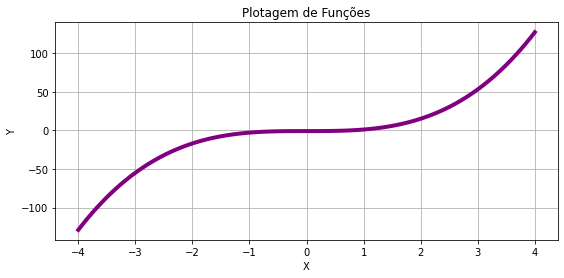

In [61]:
x = np.linspace(-4, 4, 100)
F1 = 2 * x**3 - 1
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle= '-')
plt.title('Plotagem de Funções')

plt.plot(x, F1, color="purple", linewidth=4.0, linestyle="-")
plt.savefig("figura1.png", dpi=72)
plt.show()

# $$Q15.$$

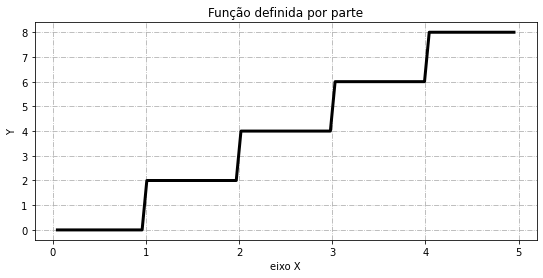

In [62]:
def escada(x):
    if 0 < x <= 1:
        return 0
    if 1 <= x < 2:
        return 2
    if 2 < x < 3:
        return 4
    if 3 < x < 4:
        return 6
    if 4 < x < 5:
        return 8

X = np.linspace(0,5,100)

Fm = [escada(x) for x in X]

plt.xlabel('eixo X')
plt.ylabel('Y')
plt.grid(True, linestyle = '-.')
plt.title("Função definida por parte")
plt.plot(X, Fm, color="black", linewidth=3.0, linestyle="-")
plt.savefig("multiplas_partes.png", dpi=72)
plt.show()

# $$Q16.$$

Coeficiente diferencial em matemática descreve a alteração na proporção de uma grandeza em relação a alteração de outra grandeza, dependente da primeira.

# $$Q17.$$

In [64]:
# # função para o coeficiente diferencial
# f = lambda x, a, b: a*x + b
# coeficiente = lambda f, a, h: (f(a + h) - f(a))/ h

# coeficiente(lambda x: a*x + b, 2, 2)

# $$Q18.$$

In [65]:
def f(x):
    return x**2 + 1
    
def coeficiente(a, h):
    return (f(a + h) - f(a))/ h

coeficiente(1,4)

6.0

In [66]:
f = lambda x : x**3 - 2
coeficiente = lambda a, h: (f(a + h) - f(a))/h

coeficiente(1,4)

31.0

# $$Q19.$$

# $$19.a)$$

$$y = x^2 + 1$$

In [67]:
h = [1,2,3,4,5,6,7,8,9]
f = lambda x: x**2 + 1
coeficiente = lambda f, a, h: (f(a + h) - f(a))/h

for i in h:
    print(coeficiente(f, 1, i))

3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0


# $$19.b)$$

$$f(x) = x^3 - 2$$

In [68]:
h = [1,2,3,4,5,6,7,8,9]
f = lambda x: x**3 - 2
coeficiente = lambda f, a, h: (f(a + h) - f(a))/h

for i in h:
    print(coeficiente(f, 1, i))

7.0
13.0
21.0
31.0
43.0
57.0
73.0
91.0
111.0


# $$Q20.$$

# $$20. a)$$

$$y = x^2 + 1$$

In [69]:
h = [1/i**2 for i in range(1,40)]
f = lambda x: x**2 + 1
coeficiente = lambda f, a, h: (f(a + h) - f(a))/h

for i in h:
    print(coeficiente(f, 1, i))

3.0
2.25
2.1111111111111125
2.0625
2.0399999999999974
2.027777777777761
2.020408163265309
2.015625
2.012345679012358
2.010000000000023
2.0082644628098807
2.006944444444443
2.0059171597633014
2.005102040816329
2.0044444444443865
2.00390625
2.00346020761258
2.003086419753078
2.0027700831024475
2.0025000000000404
2.002267573695966
2.002066115702398
2.0018903591684074
2.001736111111313
2.001600000000048
2.0014792899408143
2.001371742112392
2.001275510204046
2.0011890606422558
2.0011111111110313
2.001040582726271
2.0009765625
2.0009182736457394
2.0008650519029434
2.0008163265304413
2.0007716049379525
2.0007304601900158
2.000692520775317
2.0006574621956146


$$f(x) = x^2 + 1$$

$$\lim_{h \to 0}\frac{f(1+h) - f(1)}{h}=2$$

# $$20. b)$$

$$f(x) = x^3 - 2$$

In [70]:
h = [1/i**2 for i in range(1,40)]
f = lambda x: x**3 - 2
coeficiente = lambda f, a, h: (f(a + h) - f(a))/h

for i in h:
    print(coeficiente(f, 1, i))

7.0
3.8125
3.3456790123456814
3.19140625
3.121600000000002
3.0841049382715964
3.061640982923785
3.047119140625
3.037189452827334
3.0301000000000133
3.0248616897752676
3.0208815586419497
3.017786492069636
3.0153321532694446
3.0133530864197566
3.0117340087890625
3.01039259587414
3.0092687852461966
3.0083179226678474
3.007506249999903
3.006807862978818
3.006202615941426
3.0056746509625087
3.005211347415255
3.004802560000047
3.004440058121375
3.004117108013722
3.0038281575382944
3.0035685957916463
3.0033345679010726
3.0031228309911113
3.0029306411743164
3.002755664163262
3.002595904023959
3.002449645980898
3.0023154101887854
3.0021919141418674
3.0020780419115054
3.0019728188438783


$$f(x) = x^3 - 2$$

$$\lim_{h \to 0}\frac{f(1+h) - f(1)}{h}=3$$

# Soma de Riemann

In [71]:
def soma_riemann(f, a, b, n):
    h = (b-a) / n
    return sum([f(a + k*h) * h for k in range(1,n+1)])

# f(x), a, b, n_retangulos
# com n_retangulos maior, o resultado se aproxima do valor da integral
print(soma_riemann(f=lambda x: x**2, a=2, b=3, n=10))
print(soma_riemann(f=lambda x: x**2, a=2, b=3, n=100))
print(soma_riemann(f=lambda x: x**2, a=2, b=3, n=1000))
print(soma_riemann(f=lambda x: x**2, a=2, b=3, n=10000))
print(soma_riemann(f=lambda x: x**2, a=2, b=3, n=1000000))

6.585000000000001
6.358349999999998
6.335833499999996
6.333583334999982
6.333335833333419


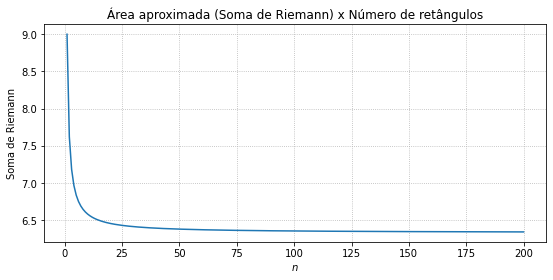

In [72]:
Y = [soma_riemann(lambda x: x**2, 2, 3, n) for n in range(1,200+1)]

plt.xlabel('$n$')
plt.ylabel('Soma de Riemann')
plt.grid(linestyle=':')
plt.title('Área aproximada (Soma de Riemann) x Número de retângulos')
plt.plot(range(1,200+1), Y);

In [73]:
printing.init_printing()
x, y, z, h = symbols('x y z h')
a, b, k, m, n = symbols('a b k m n', integer=True)
f, g = map(Function, 'fg')

In [74]:
# integral indefinida
integrate(x**2)

In [134]:
# resultado da integral definida, usando a função obtida
# é a subtração das áreas: (b - a)
a = 2
b = 3
print((b**3)/3 - (a**3)/3)

6.333333333333334


In [76]:
# mesmo valor do obtido na soma de riemann, para n grande
print(19/3)

6.333333333333333


# Relações trigonométricas no círculo

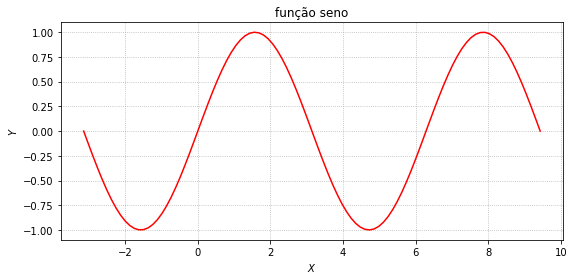

In [77]:
X = np.linspace(-np.pi, 3*np.pi, 100)
Y = np.sin(X)

plt.title('função seno')
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.grid(linestyle=':')
plt.plot(X, Y, color='r');

In [138]:
# desabilitando as saídas em LaTeX
printing.init_printing(pretty_print=False)

# `map`, `filter` e `reduce`

In [139]:
list(map(lambda x: 2*x, [1, 2, 3, 4, 5, 6, 7, 8, 9]))

[2, 4, 6, 8, 10, 12, 14, 16, 18]

In [140]:
list(filter(lambda x: x%2 == 0, [1, 2, 3, 4, 5, 6, 7, 8, 9]))

[2, 4, 6, 8]

In [141]:
reduce(lambda x, y: x+y, [1, 2, 3, 4, 5, 6, 7, 8, 9])

45

In [142]:
print(reduce(lambda x, y: x if x>y else y, [1, 2, 3, 4, 5, 6, 7, 8, 9]))
print(reduce(lambda x, y: x if x<y else y, [1, 2, 3, 4, 5, 6, 7, 8, 9]))

9
1


# Matemática simbólica
09 de maio de 2019

In [143]:
# habilitando as saídas em LaTeX
printing.init_printing(pretty_print=True)

In [144]:
equation = Eq(x**3 + 2*x**2 + 4*x + 8, 0)
display(equation)
display(simplify(equation))

# resolvendo para x
solve(equation, x)

In [83]:
equation = Eq(2*x**2 + 4*x + 8, 0)
display(equation)
display(simplify(equation))

# resolvendo para x
solve(equation, x)

In [84]:
function = ((1 + h)**2 - 1) / h
display(function)

display(limit(function, h, 0))

In [85]:
function = x**3 + 1
display(function)

# derivada
diff(function, x)

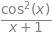

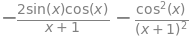

In [86]:
function = (cos(x))**2 / (1 + x)
display(function)

# derivada
diff(function, x)

In [87]:
function = (x + 1)**7
display(function)
expand(function)

In [88]:
function = (x + 1)**2
display(function)
expand(function)

In [89]:
equation = Eq(x**3 - 1, 0)
display(equation)
solve(equation)

In [90]:
equation = Eq(x**3 - 1, 4)
display(equation)
solve(equation)

# Derivadas
16 de maio de 2019

No cálculo, a derivada em um ponto de uma função ${\displaystyle y = f(x)}$ representa a taxa de variação instantânea de ${\displaystyle y}$ em relação a ${\displaystyle x}$  neste ponto.

In [91]:
f = 2*sin(x) + cos(x)

display(f)
display(diff(f))
display(diff(diff(f)))
display(diff(diff(diff(f))))
display(diff(diff(diff(diff(f)))))

In [92]:
f = 3*x**5 - x**3 + 4*x**2 - 5*x + 8

display(f)
display(diff(f))
display(diff(diff(f)))
display(diff(diff(diff(f))))
display(diff(diff(diff(diff(f)))))
display(diff(diff(diff(diff(diff(f))))))
display(diff(diff(diff(diff(diff(diff(f)))))))

**Exercícios**
1. Encontre as derivadas de todas as ordens de $f(x) = 3x^{5} - x^{3} + 4x^{2} - 5x + 8$

1. Determine $f^{(4)}(x)$ para $f(x) = \mathrm{\sin}(x) - 2\mathrm{\cos}(x) + x^{4} + 7$

1. Calcule $f^{(n)}(x)$ para $f(x) = e^x$

1. Calcule $f^{(n)}(x)$ para $f(x) = e^{2x}$

1. Calcule $f'''(x)$ para $f(x) = {1 \over x}$

1. Calcule $f^{(n)}(x)$ para $f(x) = {1 \over x}$

# Máximos, mínimos e pontos de inflexão

Um ponto crítico, também chamado de ponto estacionário, é um ponto no domínio de uma função onde a primeira derivada é nula ou não é definida. Os pontos críticos serão sempre pontos de máximos ou mínimos relativos ou pontos de inflexão

**Exercícios**

Faça um estudo dos pontos em que as funções a seguir são *crescentes* ou *decrescentes*, assinalando também os pontos de *máximo*, *mínimo* e *inflexão*:

1. $f(x) = x^4 - 10 x^2$

1. $f(x) = x^3 + 2$

1. $y = x^2 + x -4$

1. $f(x) = x^3 - 2x^2 - 5x + 6$

1. $y = -4x^3 + 3x^2 + 18x$

1. $f(x) = + {x^3 \over 2} -3x^2 + 6x $

In [93]:
def successive_diff(f, n='all'):
    display(f)
    if n == 'all':
        zero = False
        while zero == False:
            f = diff(f)
            display(f)
            if f == 0:
                zero = True
    else:
        for i in range(1, n+1):
            f = diff(f)
            display(f)

In [94]:
successive_diff(x**4 - 10*x**2)

# Gráfico de derivadas
22 de maio de 2019

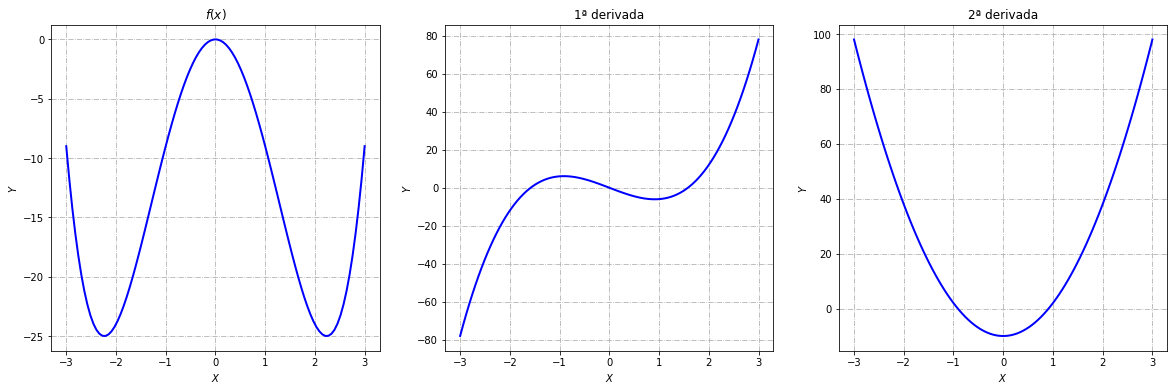

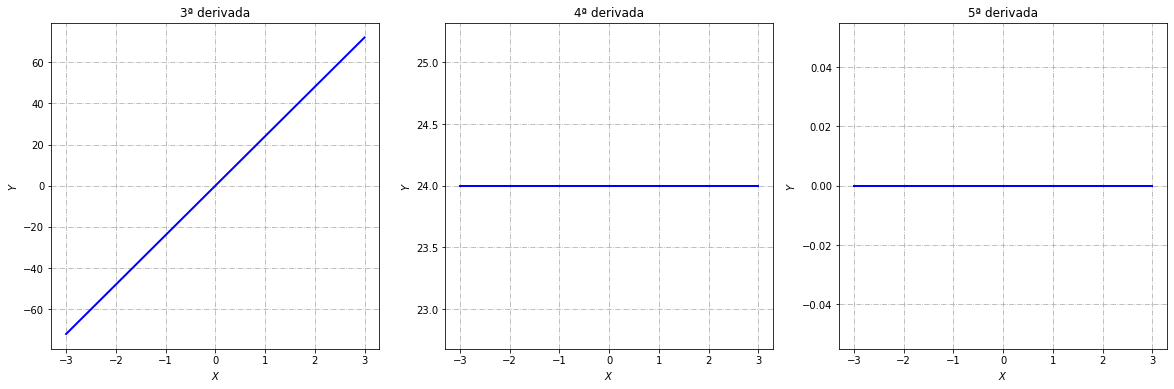

In [151]:
X = np.linspace(-3, 3, 100)

fplot1 = lambda x: x**4 - 10 * x **2
fplot2 = lambda x: 4*x**3 - 10*x
fplot3 = lambda x: 12*x**2 - 10
fplot4 = lambda x: 24*x
fplot5 = lambda x: 24
fplot6 = lambda x: 0

F1 = [fplot1(x) for x in X]
F2 = [fplot2(x) for x in X]
F3 = [fplot3(x) for x in X]
F4 = [fplot4(x) for x in X]
F5 = [fplot5(x) for x in X]
F6 = [fplot6(x) for x in X]

derivatives = [F1, F2, F3, F4, F5, F6]
titles = ['$f(x)$', '1ª derivada', '2ª derivada', '3ª derivada',
          '4ª derivada', '5ª derivada', '6ª derivada']

fig1, ax1 = plt.subplots(1, 3, figsize=(20,6))
fig2, ax2 = plt.subplots(1, 3, figsize=(20,6))
axes = [ax1, ax2]

for x, y, k in zip(range(3), range(3,6+1), range(6)):
    for a in axes:
        a[k].set_xlabel('$X$')
        a[k].set_ylabel('$Y$')
        a[k].grid(True, linestyle='-.')

    # primeira linha
    ax1[k].set_title(titles[k])
    ax1[k].plot(X, derivatives[x], color='blue', linewidth=2.0, linestyle='-')

    # segunda linha
    ax2[k].set_title(titles[6-(3-k)])
    ax2[k].plot(X, derivatives[y], color='blue', linewidth=2.0, linestyle='-')

# Integrais
23 de maio de 2019

No cálculo, a integral de uma função foi criada originalmente para determinar a área sob uma curva no plano cartesiano.



**Integral Definida**

$$\int_{a}^{b} f(x)\ dx$$

In [96]:
integrate(x**2, (x, 0, 1))

**Integral Indefinida**

$$\int f(x)\ dx$$

In [97]:
integrate(x**2, x)

$$\int x^2\ dx = \frac{x^3}{3} + C$$

Determine as seguintes integrais indefinidas
$$\int (x^3 - 4x^2 + 6x + 3$)\ dx$$
$$\int \mathrm{sin}(x) \ dx$$
$$\int e^x \ dx$$
$$\int (\frac{1}{x^2} + e^{x}) \ dx$$
$$\int \frac{1}{\sqrt{1 - t^2}}\ dt$$
$$\int \mathrm{sin}(t)\ dt$$
$$\int \mathrm{cos}(t)\ dt$$

In [98]:
integrate(x**3-4*x**2+6*x+3, x)

In [99]:
integrate(sin(x))

In [100]:
e = exp(1)
integrate(e**x, x)

Determine as seguintes integrais definidas
$$\int_{0}^{4} x^3\ dx$$
$$\int_{0}^{4} (x^3 + 10)\ dx$$
$$\int_{0}^{2} (t^4 - t)\ dt$$
$$\int_{-5}^{5} x^3\ dx$$
$$\int_{0}^{4} \sqrt{x}\ dx$$
$$\int_{0}^{2} \sqrt{1 - t^3}\ dt$$
$$\int_{-3}^{3} \mathrm{sin}(x)\ dx$$
$$\int_{-3}^{3} (\mathrm{sin}(x)+\mathrm{cos}(x))\ dx$$

In [185]:
print(integrate(x**3, (x, 0, 4)))

64


In [186]:
print(integrate(x**3+10, (x,0,4)))

104


Formule uma regra geral para determinar as integrais indefinidas a seguir, sabendo que $n \in \mathbb{N}$:
  - $\int x^n \ dx$
  - $\int e^{nx} \ dx$
  - $\int \frac{1}{x^n} \ dx$
  - $\int \mathrm{\sin}(n x)\ dx$

**Exercícios**
$$km, \ hm, \ dam, \ m, \ dm, \ cm, \ mm$$
- Para as unidades de medida citadas acima, escreva uma função que receba como parâmetros `valor_entrada: float`, `unidade_entrada: str` e `unidade_saida: str` e que retorne `valor_saida: float`. A função deve emitir uma mensagem de erro caso as unidades de medida sejam incompatíveis.
- Escreva uma função que faça a conversão de graus **Kelvin** para **Fahrenheit**, emitindo uma mensagem de erro caso as unidades de medida sejam incompatíveis.

In [103]:
# exercício 1
def conversor(valor_entrada,
              unidade_entrada,
              unidade_saida,
              unidades={'km': -3, 'hm':-2, 'dam':-1, 'm':0, 'dm':1, 'cm': 2, 'mm':3}):
    return valor_entrada * 10**(unidades[unidade_saida] - unidades[unidade_entrada])

print(conversor(1, 'm', 'dm'))
print(conversor(1, 'km', 'm'))

10
1000


Exercícios
  
1. Em que posição você estará ao sair do quilômetro 20 de uma estrada e viajar durante 2 horas a uma velocidade constante de 90km/h?

1. Escreva uma função em Python para definir a **Função Horária do MRU**.

In [184]:
# exercício 1

S = lambda s0:(lambda v:(lambda t:(s0 + v*t)))
print(S(20)(90)(2))

200


In [105]:
# exercício 2

def tempo_pos(s0, v, t):
    return s0 + v*t

S = lambda s0:(lambda v:(lambda t:(s0 + v*t)))

# Aplicações físicas da derivada

Exercício 1
- Expresse a função de movimento definida acima por meio de uma função $s(t)$ escrita em Python.
- Qual é a função que permite calcular a velocidade escalar da partícula em um dado tempo $t$?
- Qual é a função que determina a aceleração escalar da partícula ao longo do tempo $t$?
- Plote as funções de *movimento*, *velocidade* e *aceleração* definidas acima.

In [106]:
# exercício 1
def pos_tempo(t):
    return (t**2)/2 + ((4*t)/ (t + 1))

S = lambda t:((t**2)/2 + ((4*t)/ (t + 1)))

print(pos_tempo(6))
print(S(6))

21.428571428571427
21.428571428571427


Exercício 2
- Considerando a função horária dos espaços de uma partícula, obtenha as funções horárias da velocidade escalar e da aceleração escalar, nos casos:

$$
\begin{aligned}
s(t)\ &= 4t^4 + 2 t^3  - 7t^2  + 10t + 5 \\
s(t)\ &= t^2 + 2 t - 3
\end{aligned}
$$

In [183]:
S = lambda s0:(lambda v:(lambda t:(s0 + v*t)))
print(S(0)(100)(4))

400


# Gráfico de derivadas: funções da posição, velocidade e aceleração
05 de junho de 2019

4.666666666666666 Posição
0 Velocidade
0 Aceleração



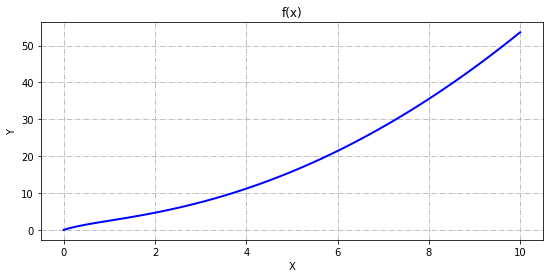

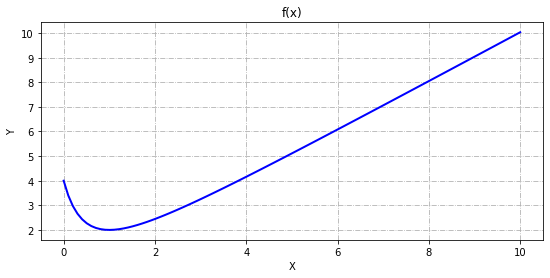

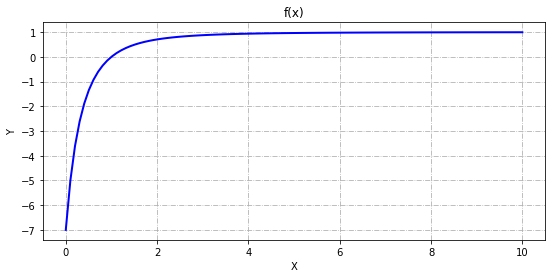

In [153]:
def plot(f):
    X = np.linspace(0, 10, 100)
    F = [f(x) for x in X]
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True, linestyle='-.')
    plt.title("f(x)")
    plt.plot(X, F, color="blue", linewidth=2.0, linestyle="-")
    plt.show()

def movimento(f):
    velocidade = diff(f)
    acel = diff(velocidade)
    print(f'{f} Posição')
    print(f'{velocidade} Velocidade')
    print(f'{acel} Aceleração', end='\n\n')
    
movimento((x**2/2)+4*x/(x+1))

plot(lambda x: x**2/2 + 4*x/(x + 1))
plot(lambda x: x - 4*x/(x + 1)**2 + 4/(x + 1))
plot(lambda x: 8*x/(x + 1)**3 + 1 - 8/(x + 1)**2)

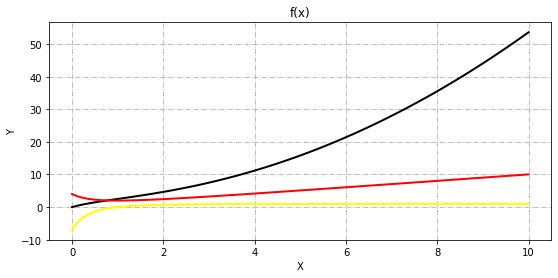

In [109]:
x = np.linspace(0, 10, 100)

F1 = (x**2/2 + 4*x/(x + 1))
F2 = (x - 4*x/(x + 1)**2 + 4/(x + 1))
F3 = (8*x/(x + 1)**3 + 1 - 8/(x + 1)**2)

plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle='-.')
plt.title('f(x)')

plt.plot(x, F1, color='black', linewidth=2.0, linestyle='-')
plt.plot(x, F2, color='red', linewidth=2.0, linestyle='-')
plt.plot(x, F3, color='yellow', linewidth=2.0, linestyle='-')
plt.show()

In [154]:
# definindo 'x' como símbolo do sympy
x = Symbol('x')

In [155]:
# posição
solve(x**2/2 + 4*x/(x + 1))

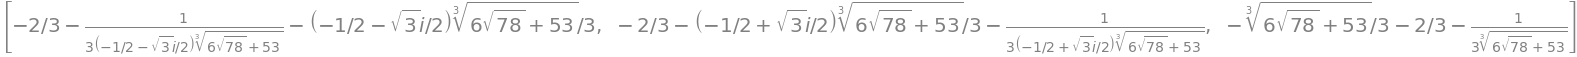

In [156]:
# velocidade (pontos críticos)
solve(x - 4*x/(x + 1)**2 + 4/(x + 1))

In [157]:
# aceleração
solve(8*x/(x + 1)**3 + 1 - 8/(x + 1)**2)

In [158]:
# def ss(f):
#     return (f**2/2) + (4*f)/(f+1)

# f = np.linspace(0, 10, 100)

# f2 = lambdify(f, diff(ss(f)), 'numpy')
# f3 = lambdify(f, diff(diff(ss(f)), 'numpy'))

# b1 = [ss(x) for x in f]
# b4 = [f2(x) for x in f]
# b3 = [f3(x) for x in f]

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.grid(True, linestyle='-.')
# plt.title('f(x)')

# plt.plot(f, b1, color='black', linewidth=2.0, linestyle='-')
# plt.plot(f, b4, color='red', linewidth=2.0, linestyle='-')
# plt.plot(f, b3, color='yellow', linewidth=2.0, linestyle='-')

# plt.show()

# Lista de Exercícios 3 - Revisão
12 de junho de 2019

## $$a.$$

In [159]:
x = Symbol('x')
f = Function('f')

In [160]:
# a. 1)

f = 2*x**4 - x**2 + 3*x + 3

display(diff(f))
display(diff(diff(f)))
display(diff(diff(diff(f))))
display(diff(diff(diff(diff(f)))))
display(diff(diff(diff(diff(diff(f))))))

In [161]:
# a. 2)
def periodic4(f):
    display(diff(f))
    display(diff(diff(f)))
    display(diff(diff(diff(f))))
    display(diff(diff(diff(diff(f)))))
periodic4(cos(x)- sin(x))

In [162]:
# a. 3)
def periodic4(f):
    display(diff(f))
    display(diff(diff(f)))
    display(diff(diff(diff(f))))
    display(diff(diff(diff(diff(f)))))
periodic4(exp(2*x))

In [163]:
# a regra geral, em função de n, obedece ao padrão
# (2**n) * (e**(2*x)) em que n é a ordem de derivada desejada

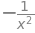

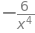

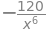

In [164]:
# a. 4)
def periodic4(f):
    display(diff(f))
    display(diff(diff(f)))
    display(diff(diff(diff(f))))
    display(diff(diff(diff(diff(f)))))
    display(diff(diff(diff(diff(diff(f))))))
periodic4(1/x)

In [165]:
# a regra geral, em função de n, obedece ao padrão
# (-1)**n * n! / x**(n+1) em que n é a ordem de derivada desejada

In [166]:
# prova
display(diff(diff(diff(diff(diff(diff(1/x)))))))

## $$b.$$

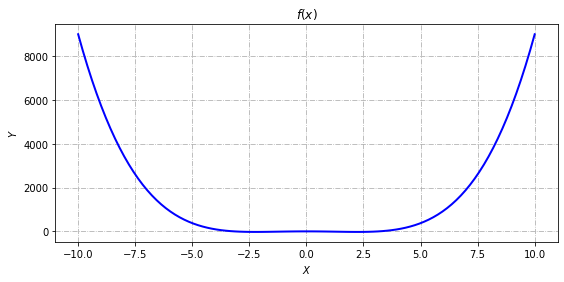

In [167]:
# b. 1)
def plot(f):
    X = np.linspace(-10, 10, 100)
    F = [f(x) for x in X]
    plt.xlabel('$X$')
    plt.ylabel('$Y$')
    plt.grid(True, linestyle='-.')
    plt.title('$f(x)$')
    plt.plot(X, F, color='blue', linewidth=2.0, linestyle='-')
    plt.show()

plot(lambda x: x**4 - 10*x**2)

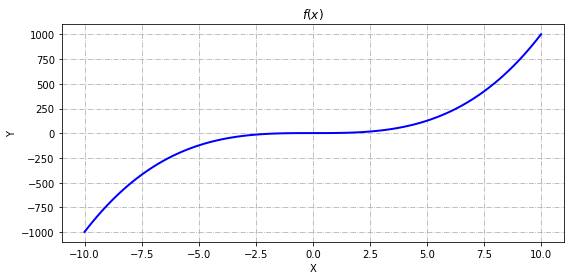

In [168]:
# b. 2)
def plot(f):
    X = np.linspace(-10, 10, 100)
    F = [f(x) for x in X]
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True, linestyle='-.')
    plt.title('$f(x)$')
    plt.plot(X, F, color='blue', linewidth=2.0, linestyle='-')
    plt.show()

plot(lambda x: x**3 + 2)

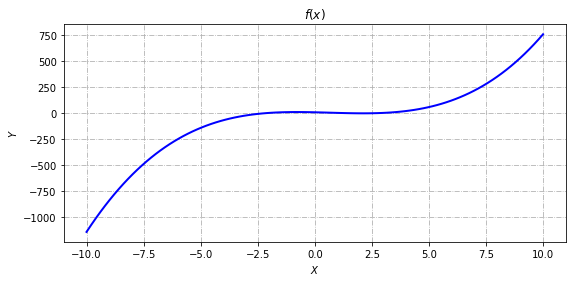

In [169]:
# b. 3)
def plot(f):
    X = np.linspace(-10, 10, 100)
    F = [f(x) for x in X]
    plt.xlabel('$X$')
    plt.ylabel('$Y$')
    plt.grid(True, linestyle='-.')
    plt.title('$f(x)$')
    plt.plot(X, F, color='blue', linewidth=2.0, linestyle='-')
    plt.show()

plot(lambda x: x**3 - 2*x**2 - 5*x + 6)

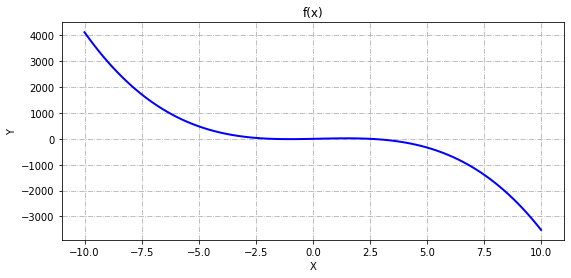

In [170]:
# b. 4)
def plot(f):
    X = np.linspace(-10, 10, 100)
    F = [f(x) for x in X]
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True, linestyle='-.')
    plt.title("f(x)")
    plt.plot(X, F, color="blue", linewidth=2.0, linestyle="-")
    plt.show()
    
plot(lambda x: -4*x**3 + 3*x**2 + 18*x)

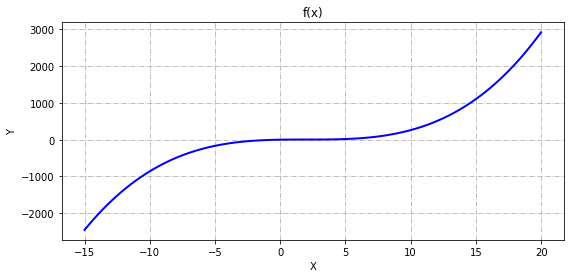

In [171]:
# b. 5)
def plot(f):
    X = np.linspace(-15, 20, 100)
    F = [f(x) for x in X]
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True, linestyle='-.')
    plt.title("f(x)")
    plt.plot(X, F, color="blue", linewidth=2.0, linestyle="-")
    plt.show()
    
plot(lambda x: x**3/2 - 3*x**2 + 6*x)

## $$c.$$

In [172]:
# c. 1)
integrate(2 - 2*x**3,(x, 1,2))

In [173]:
# c. 2)
integrate(x**2-1,(x, 0,1))

## $$d.$$

In [182]:
def roma_riemann(f, a, b, n):
    h = (b - a) / n
    soma = 0
    serie = [f(a + k * h) * h for k in range(1, n+1)]
    for i in serie:
        soma = soma + i
    return soma
    
print(roma_riemann(lambda x: x**2, 0, 1, 300))
print(-(roma_riemann(lambda x: x**2, 1, 0, 300)), end='\n\n')

display(integrate(x**2, (x,0,1)))
print('\n')
display(integrate(x**2, (x,1,0))*-1)

0.3350018518518521
0.33166851851851836



## $$e.$$

In [179]:
# e. 1)

def s(t):
    return t**3/3 + 3*t**2/2 + 2*t

print(s(5))

89.16666666666666


In [176]:
# e. 2)
print('velocidade')
diff(x**3/3 + 3*x**2/2 + 2*x)

velocidade


In [177]:
print('aceleração')
diff(diff((x**3/3 + 3*x**2/2 + 2*x)))

aceleração


In [180]:
soma = lambda x: 1 if x == 1 else x+soma(x-1)
print(soma(10))

55
